In [1]:
# Import Python libraries

import pandas as pd
import glob  
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Use glob to match files in the pattern 'csv'
filenames = glob.glob('resale-flat-prices*.csv') # Store all csv file's names into a list called filenames
filenames # show items in the filenames list

['resale-flat-prices-based-on-approval-date-1990-1999.csv',
 'resale-flat-prices-based-on-approval-date-2000-feb-2012.csv',
 'resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv',
 'resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv',
 'resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv']

In [3]:
# Combine all csv files in the list into one
hdb_flat_resale = pd.concat([pd.read_csv(f) for f in filenames]) # combine data in all csv file and store in hdb_flat_resale
hdb_flat_resale.to_csv( "hdb_flat_resale.csv", index=False, encoding='utf-8-sig') #Convert hdb_flat_resale to a csv file

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [4]:
# Read the hdb_flat_resale.csv file
df = pd.read_csv("hdb_flat_resale.csv")

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Get the first 5 observations in the dataframe
df.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
0,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,9000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO
1,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,6000.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO
2,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,8000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO
3,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,6000.0,07 TO 09,ANG MO KIO AVE 1,ANG MO KIO
4,216,NEW GENERATION,3 ROOM,73.0,1976,1990-01,NaN,47200.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO


In [6]:
# Observe data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800631 entries, 0 to 800630
Data columns (total 11 columns):
block                  800631 non-null object
flat_model             800631 non-null object
flat_type              800631 non-null object
floor_area_sqm         800631 non-null float64
lease_commence_date    800631 non-null int64
month                  800631 non-null object
remaining_lease        91577 non-null object
resale_price           800631 non-null float64
storey_range           800631 non-null object
street_name            800631 non-null object
town                   800631 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 67.2+ MB


In [7]:
# Check the total number of missing value in each column
df.isna().sum()

block                       0
flat_model                  0
flat_type                   0
floor_area_sqm              0
lease_commence_date         0
month                       0
remaining_lease        709054
resale_price                0
storey_range                0
street_name                 0
town                        0
dtype: int64

In [8]:
# Observe the number of flat sale in each storey_range
df['storey_range'].value_counts()

04 TO 06    203612
07 TO 09    183767
01 TO 03    164158
10 TO 12    155519
13 TO 15     49713
16 TO 18     18279
19 TO 21      8947
22 TO 24      5704
01 TO 05      2700
06 TO 10      2474
25 TO 27      2339
11 TO 15      1259
28 TO 30       943
16 TO 20       265
34 TO 36       233
31 TO 33       218
37 TO 39       216
40 TO 42       107
21 TO 25        92
26 TO 30        39
46 TO 48        17
43 TO 45        13
49 TO 51         8
36 TO 40         7
31 TO 35         2
Name: storey_range, dtype: int64

In [9]:
# Observe the resale_price detail by storey_range
df.groupby(['storey_range'])['resale_price'].describe()

,count,mean,std,min,25%,50%,75%,max
storey_range,,,,,,,,
01 TO 03,164158.0,2.706257e+05,133086.915990,5000.0,170000.0,255000.0,350000.0,1185000.0
01 TO 05,2700.0,4.305680e+05,103721.766510,242000.0,353000.0,417000.0,488222.0,900000.0
04 TO 06,203612.0,2.754204e+05,136110.538265,6000.0,172000.0,260000.0,360000.0,1058000.0
06 TO 10,2474.0,4.515410e+05,107693.374836,240000.0,371000.0,435000.0,510000.0,869000.0
07 TO 09,183767.0,2.779310e+05,138203.214582,6000.0,173000.0,261500.0,363800.0,1050000.0
10 TO 12,155519.0,2.845763e+05,142120.676980,5800.0,176000.0,266000.0,372000.0,1088000.0
11 TO 15,1259.0,4.705736e+05,106944.539007,254000.0,392500.0,459000.0,531900.0,910000.0
13 TO 15,49713.0,3.353769e+05,155327.713045,13500.0,225000.0,330000.0,434000.0,1095000.0
16 TO 18,18279.0,3.827351e+05,170644.657892,15300.0,264000.0,380000.0,480000.0,1050000.0


Things to take note:
    The storey_range not standardised
    Contains duplicates data 

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


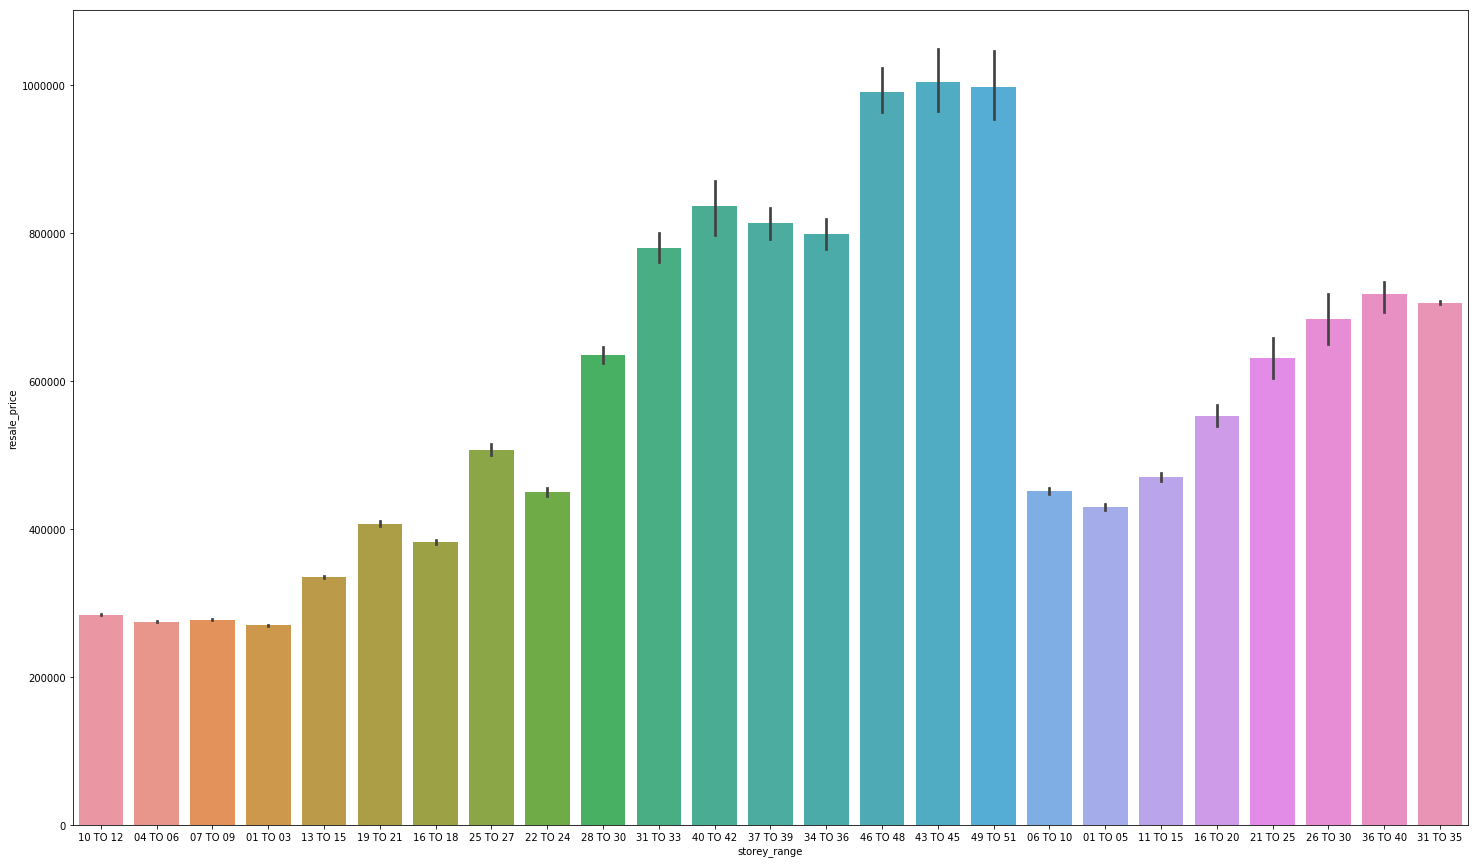

In [10]:
# Plot the bar graph for storey_range against resale_price
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.barplot(x = 'storey_range', y = "resale_price", data = df)
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


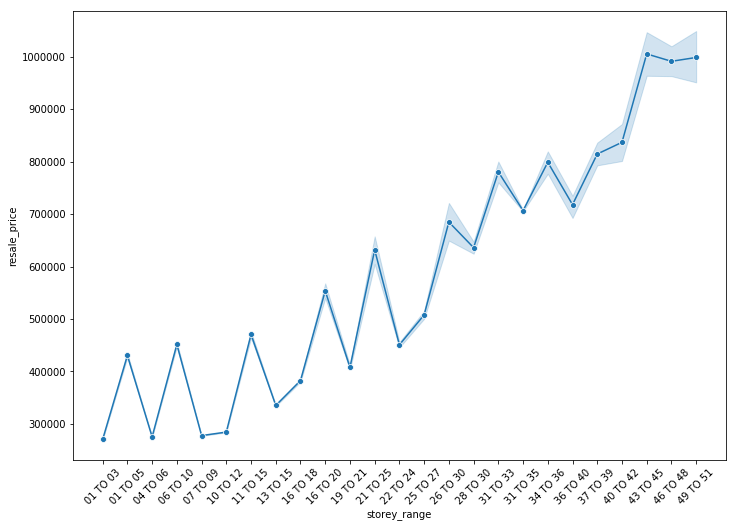

In [11]:
# Plot the line graph for storey_range against resale_price
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.lineplot(data=df, x='storey_range', y='resale_price', marker='o')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Observe the number of flat sale in each town
df['town'].value_counts()

TAMPINES           71274
YISHUN             61112
BEDOK              59979
JURONG WEST        58953
WOODLANDS          56920
ANG MO KIO         47124
HOUGANG            44179
BUKIT BATOK        39626
CHOA CHU KANG      32314
BUKIT MERAH        29617
PASIR RIS          29418
TOA PAYOH          27737
QUEENSTOWN         25264
CLEMENTI           25186
GEYLANG            25062
KALLANG/WHAMPOA    23411
BUKIT PANJANG      22981
JURONG EAST        22296
SENGKANG           21615
SERANGOON          20661
BISHAN             19078
PUNGGOL            10733
SEMBAWANG          10392
MARINE PARADE       7255
CENTRAL AREA        6155
BUKIT TIMAH         2225
LIM CHU KANG          64
Name: town, dtype: int64

In [13]:
# Observe the resale_price detail in each town 
df.groupby(['town'])['resale_price'].describe()

,count,mean,std,min,25%,50%,75%,max
town,,,,,,,,
ANG MO KIO,47124.0,235250.249542,137404.432340,5600.0,148000.0,205000.0,308000.0,980000.0
BEDOK,59979.0,253920.735670,137162.099054,13500.0,155000.0,226000.0,332000.0,935000.0
BISHAN,19078.0,391334.333490,170682.776268,29000.0,272125.0,375000.0,490000.0,1180000.0
BUKIT BATOK,39626.0,252807.534832,129942.453071,25000.0,153000.0,232000.0,330000.0,938000.0
BUKIT MERAH,29617.0,310558.492235,204494.126184,5000.0,153000.0,266888.0,425000.0,1200000.0
BUKIT PANJANG,22981.0,300809.572137,122874.179634,41000.0,208000.0,285000.0,380000.0,840000.0
BUKIT TIMAH,2225.0,414493.776180,199135.792748,35000.0,283000.0,397000.0,518000.0,1058000.0
CENTRAL AREA,6155.0,289895.599818,212525.449201,18500.0,157000.0,228000.0,378000.0,1188000.0
CHOA CHU KANG,32314.0,320620.749200,101149.441565,30000.0,248000.0,316000.0,385000.0,900000.0


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


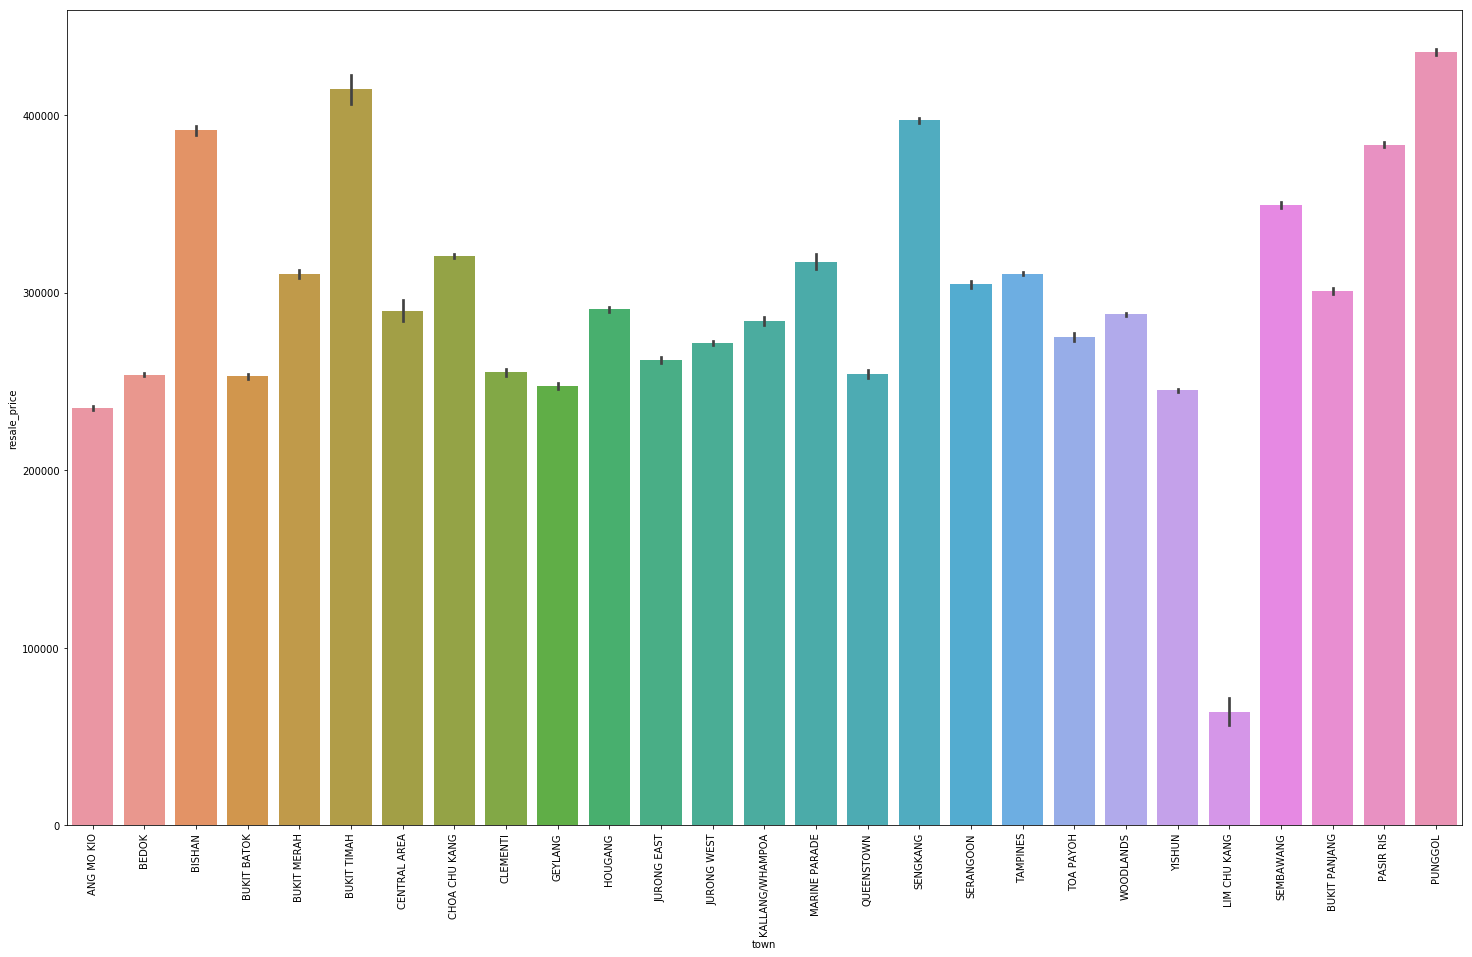

In [14]:
# Plot the bar graph for town against resale_price
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.barplot(x = 'town', y = "resale_price", data = df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Plot the line graph for town against resale_price
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.lineplot(data=df, x='town', y='resale_price', marker='o')
plt.xticks(rotation=45)
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
